# Sklearn

Scikit-learn (sklearn) is built on NumPy, SciPy and matplotlib

Very fast and efficient

Prefers working with arrays

Previously we were working with dataframes, but we need to transform the data into ndarrays for this type of work.

Advantages:
- incredible documentation
- variety:
    - regression
    - classification
    - clustering
    - support vector machines
    - dimensionality reduction

Deep learning is a weakspot, where tensorflow, keras and pytorch are better

sklearn is numerically stable... probably around floating point number management.

## Simple linear regression

### Import the relevant libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

from sklearn.linear_model import LinearRegression

### Load the data


In [30]:
data = pd.read_csv('/Users/jackyaffe/Google Drive/Jack/Udemy/DataSci/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S34_L209/1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


### Create the regression

#### Declare the dependent and independent variables

In [31]:
x = data['SAT'] # independent variable, input feature
y = data['GPA'] # dependent variable, output target

In [32]:
x.shape

(84,)

In [33]:
y.shape

(84,)

X needs to be reshaped as the reg.fit later needs an array

In [34]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

#### Regression itself

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(x_matrix,y) # (input, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Standardisation: the process of subtracting the mean and dividing by the standard deviation (a type of normalisation)

Normalisation: has different meaning depending on the case; here - we subtract the mean but divide by the L2-norm of the inputs.

Copy = makes a copy of the variables as a safety net when doing calcs

Fit intercept = adds a constant, which we manually did in the old method.

N jobs = threads

#### R-Squared

In [37]:
reg.score(x_matrix,y)

0.40600391479679754

#### Coefficients

In [38]:
reg.coef_

array([0.00165569])

#### Intercept

In [39]:
reg.intercept_

0.2750402996602799

#### Making predictions

reg.predict(new_inputs) returns the predictions of the linear regression model for some new inputs

In [63]:
test = np.array([1740])
test_matrix = test.reshape(-1,1)
reg.predict(test_matrix)

array([3.15593751])

In [65]:
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [66]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [67]:
new_data['Predicted GPA'] = reg.predict(new_data)

In [68]:
new_data

,SAT,Predicted GPA
0,1740,3.155938
1,1760,3.189051


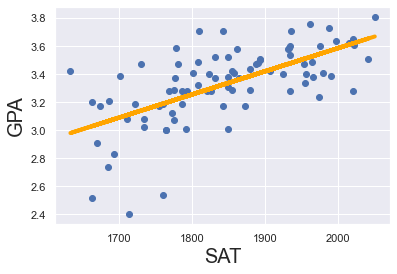

In [69]:
plt.scatter(x,y)
yhat = reg.coef_ * x_matrix + reg.intercept_
# yhat = 0.0017 * x + 0.275
fig = plt.plot(x,yhat,lw=4,c='orange',label = 'regression line')
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
plt.show()

## Multiple linear regression

### Load the data

In [70]:
data = pd.read_csv('/Users/jackyaffe/Google Drive/Jack/Udemy/DataSci/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S34_L213/1.02. Multiple linear regression.csv')

In [71]:
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [73]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


### Create the multiple linear regression

#### Declare the dependent and independent variables

In [74]:
x = data[['SAT','Rand 1,2,3']]
y = data['GPA']

#### Regression itself

In [76]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [78]:
reg.intercept_

0.29603261264909486

#### Calculating the R-squared

In [79]:
reg.score(x,y)

0.4066811952814285

#### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

n = 84 (the number of observations)  <br>
p = 2 (the number of predictors)

In [81]:
x.shape

(84, 2)

In [84]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]
r2_adj = 1 - (1 - r2) * (n-1)/(n-p-1)

In [85]:
r2_adj

0.39203134825134023

### Feature selection with F-Regression

Feature selection simplifies models, improves speed and prevents a series of unwanted issues arising from having too many features

If a variable has a p score over 0.05 we can ignore it

feature_selection.f_regression => creates a simple linear regression of each feature and the dependent variable. So if there are two features, the f_regression would create two regressions and calculate the score for each.

Note that for a simple linear regression, the p-value of F-stat = the p-value of the only independent variable

In [86]:
from sklearn.feature_selection import f_regression

In [87]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

The two arrays outputted from the f_regression are:
 - f-statistics
 - p-values

We are only interested in the p-values here...

In [88]:
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [89]:
p_values.round(3)

array([0.   , 0.676])

The p-value of SAT is 0.000 and the p-value of Rand 1,2,3 is 0.676... i.e. SAT is useful, rand is useless

Note: these are the univariate p-values reached from simple linear models. They do not reflect the interconnection of the features in our multiple linear regression.

#### Creating a summary table

In [92]:
reg_summary = pd.DataFrame(data=x.columns.values,columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [93]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)

In [94]:
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


p-values are one of the best ways to determine if a variable is redundant, but they provide no information whatsover about HOW USEFUL a variable is. Two values might both have a p-value of 0.000 meaning they are both relevant, but that does not mean they are both equally important.

## Features scaling (Standardisation)

The most common problem when working with numerical data is the difference in magnitudes

Standardisation is the normal fix. It is the process of transforming the data into a standard scale.

Subtract the mean and divide by the standard deviation.

There are other methods, but standardisation is the most common one.

#### Standardisation

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [98]:
x_scaled = scaler.transform(x)

In [99]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

#### Regression with scaled features

In [100]:
reg = LinearRegression()

In [101]:
reg.fit(x_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [103]:
reg.intercept_

3.330238095238095

#### Create a summary table

In [105]:
reg_summary = pd.DataFrame([['Intercept'],['SAT'],['Rand 1,2,3']], columns=['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0],reg.coef_[1]

In [106]:
reg_summary

,Features,Weights
0,Intercept,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


Weigts is the ML term for coefficients

The bigger the weight, the bigger the regression

The ML word for intercept is bias

In [108]:
reg_summary = pd.DataFrame([['Bias'],['SAT'],['Rand 1,2,3']], columns=['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0],reg.coef_[1]

In [109]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


The closer a weight is to 0, the smaller its impact. The bigger the weight, the bigger its impact.

We can clearly see that Rand 1,2,3 barely contributes to our output, if at all

When we perform feature scaling, we dont really care if a useless variable is there or not

This kinda explains why sklearn does not do much around p-values. Most ML practitioners do some sort of feature scaling before doing any models and so the effect of useless features is reduced to near zero anyway.

In general, it is best to leave out worst performing features.

#### Making predictions with the standardised coefficients (weights)

In [111]:
new_data = pd.DataFrame(data=[[1700,2],[1800,1]],columns=['SAT','Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [112]:
reg.predict(new_data)

array([295.39979563, 312.58821497])

These numbers dont make sense as the model was trained on standardised inputs, and we gave it normal ones.

The new data frame should be arranged and standardised in the same way

We already have that fit stored in the scalar object...

In [113]:
new_data_scaled = scaler.transform(new_data)

In [114]:
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [115]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

#### What if we removed the 'Rand 1,2,3 feature?

In [127]:
reg_simple = LinearRegression()
x_simple_matrix = x_scaled[:,0].reshape(-1,1)
reg_simple.fit(x_simple_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])

Comparing the results from multiple linear regression, the results are basically the same when rounding to 2d.p. When applying feature scaling, it doesnt impact much by including the bad features.

### Underfitting and overfitting

Overfitting means the training has focused on the training set so much, it has missed the point.

Underfitting means that the model has not captured the underlying logic of the data.

A 'good' model would not be perfect, but would be very close to the actual relationship.

Underfitted models are clumsy and inaccurate. 
Overfitted models capture all the noise and miss the point.

**Fix**

Split the model data into two, training and test. Train the model on the training data and test its fit against the test data which it hasnt seen before.

### Train Test Split

It make sense to split data to test models. We train the model on the training dataset and then test it on the testing set to see how it performs when given new samples.

#### Import the relevant libraries

In [130]:
import numpy as np
from sklearn.model_selection import train_test_split

#### Generate some data we are going to split

In [133]:
a = np.arange(1,101) # arange is like range, but for arrays

In [132]:
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [152]:
b = np.arange(501,601)
b

array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
       566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
       579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591,
       592, 593, 594, 595, 596, 597, 598, 599, 600])

#### Split the data

In [153]:
train_test_split(a)

[array([ 11,  23,  89,  29,  25,  42,  98,  53,  72,  31,  20,  80,  65,
         40,  76,  60,  28,  22,  38,  50,  79,   3,  57,  96,  14,  41,
         84,  49,  47,  48,  33,  17,  13,  51,  45,  93,  24,  81,  99,
         88,  27,  63,   6,  19,  55,  82,  64,  52,  92,  87,  18,  32,
         15,  61,  43,  30,  68,  94,  59,   7,  54,  69,  62,  34,   4,
         71,  46,  37,  73, 100,  90,  44,  36,  35,  78]),
 array([97, 56, 10,  1,  2,  8, 12, 26, 16, 58,  9, 77, 66, 21, 70, 91, 85,
        74,  5, 95, 86, 67, 75, 39, 83])]

In [154]:
a_train, a_test = train_test_split(a)

#### Explore the result

In [155]:
a_train.shape, a_test.shape

((75,), (25,))

In [156]:
a_train

array([ 40,  42,  53,  52,  58,  35,   8,  79,  45,  80,  22,  48,   4,
       100,  88,  10,  41,  92,  70,  62,   1,   2,  72,  31,  23,  75,
        18,  60,  57,  29,  95,  43,  19,  67,  50,  36,  11,  59,  15,
        37,  44,  46,  65,  24,  25,  17,  85,  71,  98,  63,  82,  49,
         3,  83,  93,  56,  27,  64,  33,  99,  96,  39,  87,   6,  84,
        34,  47,  90,  77,  91,  97,  69,  61,  20,  86])

In [157]:
a_test

array([28, 54, 38, 14, 94, 81, 32, 26,  5, 66, 68,  9, 89, 21, 73, 55, 30,
        7, 78, 51, 16, 74, 13, 12, 76])

Both arrays are shuffled now. We can turn that off by adding a paramfor it. We can specifiy the size of the two sets, by adding a test_size param to the splitting function.

In [158]:
a_train, a_test = train_test_split(a, test_size=0.2, shuffle = False)

In [159]:
a_train

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [160]:
a_test

array([ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100])

Mostly we like to shuffle data.

In [161]:
a_train, a_test = train_test_split(a, test_size=0.2)

In [162]:
a_train

array([ 72,  68,  14,  89,  57,  46,  53,  33,  40,  74,  52,  87,  24,
        30,  93,  26,  13,  17,  16,  66,  94,  34,  50,  22, 100,  67,
        97,  39,   4,  41,  59,  64,  81,  98,  79,   5,  49,   2,  29,
        42,  15,  36,  51,  60,  35,  48,   7,  43,  70,  56,   1,  91,
        62,  10,  11,  78,  95,  86,  47,   3,  27,  19,  31,  88,  58,
        77,  80,  83,  55,  61,  12,  23,  45,  32,  85,  76,  84,   6,
        75,  18])

Each time we run the split, the shuffler splits the original dataset differently. this is an issue for modelling. A different regression would be calculated every time. 

sklearn has a parameter for making sure the shuffle outputs the same every time... random_state.

In [163]:
a_train, a_test = train_test_split(a, test_size=0.2, random_state=42)

In [164]:
a_train

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

42 is the param chosen, its a bit of a joke in the community but works as a standard entry.

The train_test_split method can split multiple arrays at a time...

In [165]:
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size=0.2, random_state=42)

In [167]:
b_train.shape, b_test.shape

((80,), (20,))

In [168]:
b_test

array([584, 554, 571, 546, 545, 540, 523, 581, 511, 501, 519, 531, 574,
       534, 591, 505, 577, 578, 513, 532])

In [169]:
a_test

array([84, 54, 71, 46, 45, 40, 23, 81, 11,  1, 19, 31, 74, 34, 91,  5, 77,
       78, 13, 32])

As you can see.. the a and b split has happened at the same part of the array, i.e. their first element in the arrays are x84